In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
val = pd.read_csv("rich.csv")
val.shape
val.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [ ]:
val["Country"].value_counts()

Country
USA       756
France     92
Mexico     52
Spain      51
India      49
Name: count, dtype: int64

In [ ]:
a = val["Name"].value_counts()
b = pd.DataFrame(a).reset_index()
c = b.iloc[:,-1]

In [ ]:
val.head()

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [ ]:
a = val.iloc[:,[-2]]
a.head()

,Net Worth (in billions)
0,8.50
1,44.76
2,13.43
3,120.44
4,122.39


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Text(0.5, 1.0, 'relt bt them')

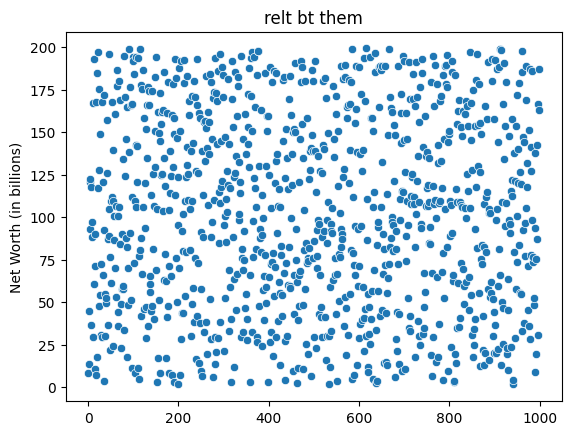

In [ ]:
sns.scatterplot(val["Net Worth (in billions)"] )
"""plt.xlabel('country')
plt.ylabel('people range')"""
plt.title('relt bt them')

In [ ]:
val.isnull().sum()

Name                       0
Country                    0
Industry                   0
Net Worth (in billions)    0
Company                    0
dtype: int64

In [ ]:
val["Name"].unique()

array(['Rob Walton', 'Sergey Brin', 'Steve Ballmer', 'Mukesh Ambani',
       'Jim Walton', 'Michael Bloomberg', 'Warren Buffett', 'Carlos Slim',
       'Larry Page', 'Alice Walton', 'Larry Ellison', 'Bernard Arnault',
       'Jeff Bezos', 'Amancio Ortega', 'Mark Zuckerberg', 'Charles Koch',
       'Bill Gates', 'Francoise Bettencourt Meyers', 'Elon Musk',
       'David Koch'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [ ]:
trainx , testx ,trainy ,testy = train_test_split(val.iloc[:,1:4] , val.iloc[:,-1] , test_size=0.3)


In [ ]:
t1 = ColumnTransformer([
    ("t1" , StandardScaler() , ["Net Worth (in billions)"])
])
t1.

ColumnTransformer(transformers=[('t1', StandardScaler(),
                                 ['Net Worth (in billions)'])])

In [ ]:
pipe = Pipeline([
    ("p1" , t1),
    ("p2" , DecisionTreeClassifier())
])

In [ ]:
pipe.fit(trainx , trainy)

Pipeline(steps=[('p1',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  ['Net Worth (in '
                                                   'billions)'])])),
                ('p2', DecisionTreeClassifier())])

In [ ]:
pipe.classes_

array(['Amazon', 'Berkshire Hathaway', 'Bloomberg LP', 'Facebook',
       'Google', 'Grupo Carso', 'Koch Industries', "L'Oreal", 'LVMH',
       'Microsoft', 'Oracle', 'Reliance Industries', 'Tesla', 'Walmart',
       'Zara'], dtype=object)

In [ ]:
trainy.head()

51     Koch Industries
283               Zara
514             Oracle
525           Facebook
892    Koch Industries
Name: Company, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
predicton = pipe.predict(testx)


In [ ]:
accuracy_scores = accuracy_score(testy, predicton)

In [ ]:
accuracy_scores

0.06666666666666667

(array([60., 70., 73., 67., 69., 84., 64., 66., 62., 85.]),
 array([  1.57 ,  21.334,  41.098,  60.862,  80.626, 100.39 , 120.154,
        139.918, 159.682, 179.446, 199.21 ]),
 <BarContainer object of 10 artists>)

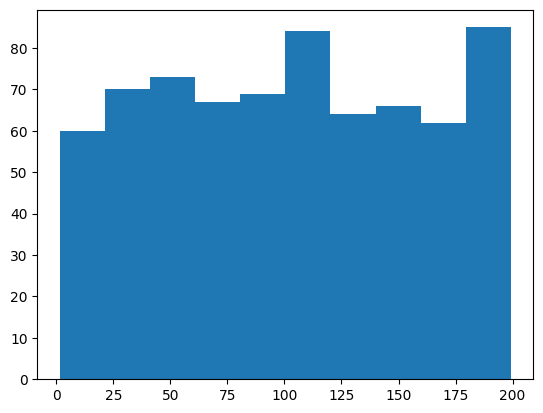

In [ ]:
y = pd.DataFrame(x)
plt.hist(y)

In [ ]:
trainx.head()

,Country,Industry,Net Worth (in billions)
191,USA,Finance,158.46
655,USA,Technology,81.38
991,USA,Fashion,9.18
247,USA,Telecommunications,37.69
822,USA,Technology,35.44


In [ ]:
x.shape

(700,)